In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whi

In [7]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Loading evaluation data...
Evaluating models...


Evaluating models: 100%|██████████| 15/15 [01:49<00:00,  7.33s/it]



Final Rankings:
                                                    MSE       MAE  \
multi-qa-mpnet-base-dot-v1                     3.551334  1.499438   
paraphrase-MiniLM-L3-v2                        0.469272  0.537689   
multi-qa-distilbert-cos-v1                     2.102394  1.142212   
all-MiniLM-L6-v2                               0.444390  0.539748   
xlm-r-100langs-bert-base-nli-stsb-mean-tokens  0.579512  0.562345   
bert-base-nli-mean-tokens                      0.905562  0.685139   
paraphrase-multilingual-MiniLM-L12-v2          0.541070  0.546449   
distilbert-base-nli-stsb-mean-tokens           0.613206  0.590277   
roberta-base-nli-stsb-mean-tokens              0.574593  0.569419   
all-MiniLM-L12-v2                              0.407849  0.521131   
bert-base-nli-stsb-mean-tokens                 0.479936  0.527253   
paraphrase-albert-small-v2                     0.468587  0.544295   
paraphrase-TinyBERT-L6-v2                      0.433668  0.504137   
all-distilroberta

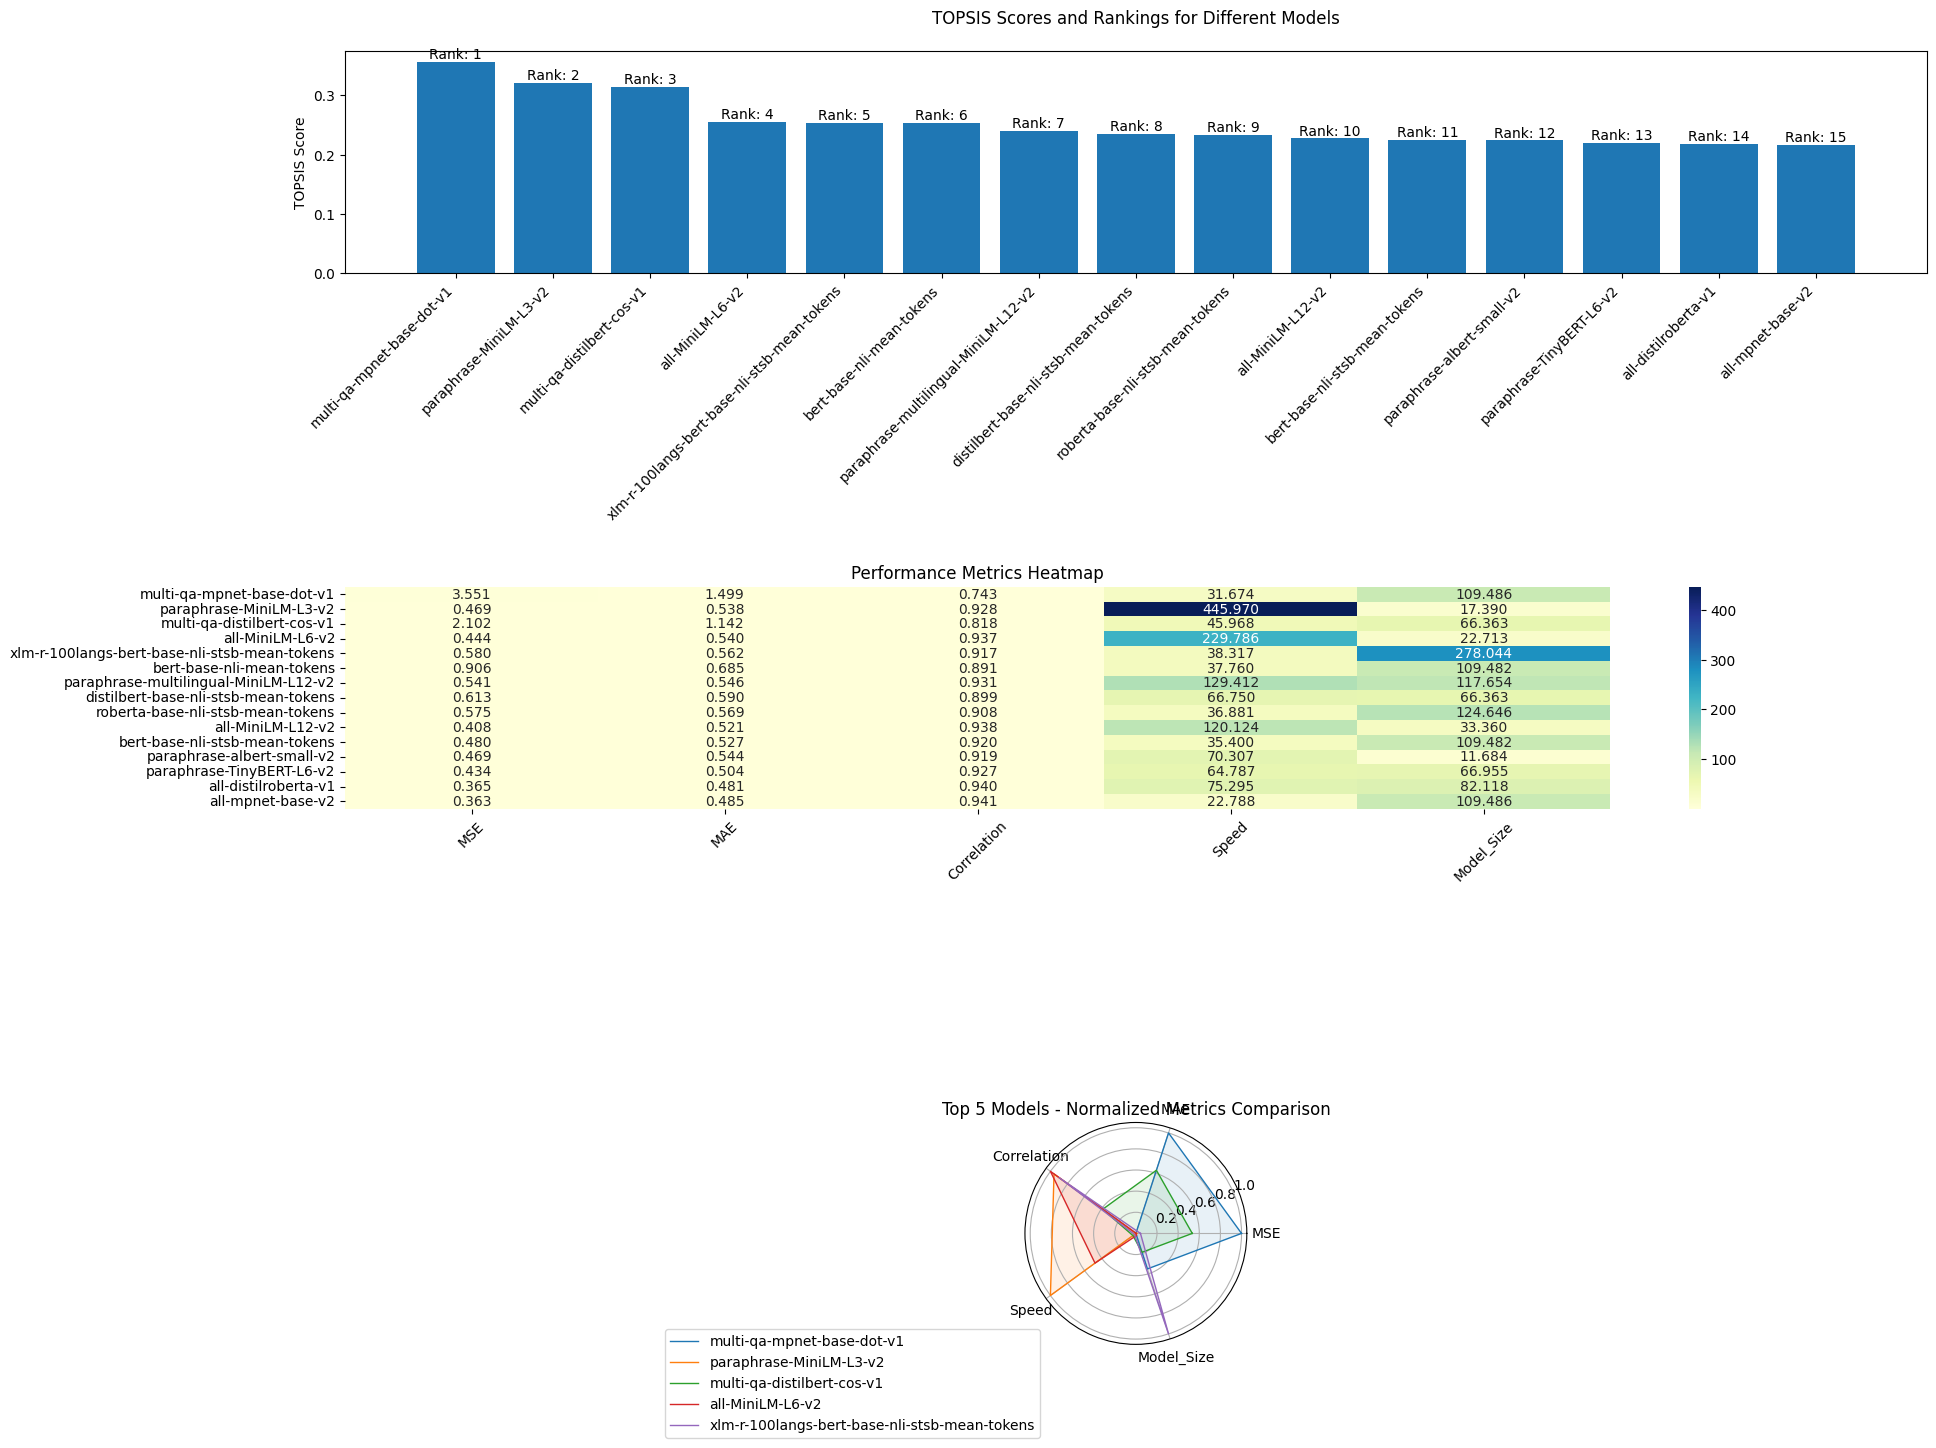

In [14]:
import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


def load_evaluation_data():
    dataset = load_dataset('glue', 'stsb')
    eval_data = dataset['validation'].select(range(100))

    return {
        'sentence1': eval_data['sentence1'],
        'sentence2': eval_data['sentence2'],
        'similarity_score': eval_data['label']
    }


def evaluate_model(model_name, eval_data):
    try:
        model = SentenceTransformer(model_name)
        sentences1 = eval_data['sentence1']
        sentences2 = eval_data['sentence2']
        true_scores = eval_data['similarity_score']

        embeddings1 = model.encode(sentences1)
        embeddings2 = model.encode(sentences2)

        similarities = np.array([
            cosine_similarity([emb1], [emb2])[0][0]
            for emb1, emb2 in zip(embeddings1, embeddings2)
        ]) * 5

        mse = np.mean((np.array(true_scores) - similarities) ** 2)
        mae = np.mean(np.abs(np.array(true_scores) - similarities))
        corr = np.corrcoef(true_scores, similarities)[0, 1]

        import time
        start_time = time.time()
        model.encode(['This is a test sentence'] * 10)
        end_time = time.time()
        speed = 10 / (end_time - start_time)

        model_size = sum(p.numel() for p in model.parameters()) / 1_000_000  # Size in millions

        return {
            'MSE': mse,
            'MAE': mae,
            'Correlation': corr,
            'Speed': speed,
            'Model_Size': model_size
        }
    except Exception as e:
        print(f"Error evaluating {model_name}: {str(e)}")
        return None


def apply_topsis(decision_matrix, weights, criteria_type):
    normalized_matrix = decision_matrix / np.sqrt(np.sum(decision_matrix ** 2, axis=0))
    weighted_normalized = normalized_matrix * weights

    ideal = np.max(weighted_normalized, axis=0) * criteria_type
    negative_ideal = np.min(weighted_normalized, axis=0) * criteria_type

    s_pos = np.sqrt(np.sum((weighted_normalized - ideal) ** 2, axis=1))
    s_neg = np.sqrt(np.sum((weighted_normalized - negative_ideal) ** 2, axis=1))

    return s_neg / (s_pos + s_neg)


def create_visualizations(results_df):
    fig = plt.figure(figsize=(20, 15))

    plt.subplot(3, 1, 1)
    topsis_scores = results_df['TOPSIS_Score'].values
    ranks = results_df['Rank'].values
    model_names = results_df.index

    bars = plt.bar(range(len(model_names)), topsis_scores)
    plt.title('TOPSIS Scores and Rankings for Different Models', pad=20)
    plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
    plt.ylabel('TOPSIS Score')

    for idx, (bar, rank) in enumerate(zip(bars, ranks)):
        plt.text(idx, bar.get_height(), f'Rank: {int(rank)}', ha='center', va='bottom')

    plt.subplot(3, 1, 2)
    metrics_cols = ['MSE', 'MAE', 'Correlation', 'Speed', 'Model_Size']
    metrics_df = results_df[metrics_cols]
    sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.3f')
    plt.title('Performance Metrics Heatmap')
    plt.xticks(rotation=45)

    plt.subplot(3, 1, 3, projection='polar')
    top_5_models = results_df.head(5)[metrics_cols]
    normalized_metrics = (top_5_models - top_5_models.min()) / (top_5_models.max() - top_5_models.min())

    angles = np.linspace(0, 2 * np.pi, len(metrics_cols), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    for idx, model in enumerate(normalized_metrics.index):
        values = normalized_metrics.loc[model].values.flatten().tolist()
        values += [values[0]]
        plt.plot(angles, values, linewidth=1, linestyle='solid', label=model)
        plt.fill(angles, values, alpha=0.1)

    plt.xticks(angles[:-1], metrics_cols)
    plt.title('Top 5 Models - Normalized Metrics Comparison')
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.tight_layout(pad=3.0)
    return fig


def main():
    models = [
        'sentence-transformers/all-MiniLM-L6-v2',
        'sentence-transformers/all-mpnet-base-v2',
        'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2',
        'sentence-transformers/all-distilroberta-v1',
        'sentence-transformers/bert-base-nli-mean-tokens',
        'sentence-transformers/multi-qa-mpnet-base-dot-v1',
        'sentence-transformers/all-MiniLM-L12-v2',
        'sentence-transformers/multi-qa-distilbert-cos-v1',
        'sentence-transformers/paraphrase-albert-small-v2',
        'sentence-transformers/bert-base-nli-stsb-mean-tokens',
        'sentence-transformers/distilbert-base-nli-stsb-mean-tokens',
        'sentence-transformers/roberta-base-nli-stsb-mean-tokens',
        'sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens',
        'sentence-transformers/paraphrase-TinyBERT-L6-v2',
        'sentence-transformers/paraphrase-MiniLM-L3-v2'
    ]

    print("Loading evaluation data...")
    eval_data = load_evaluation_data()

    print("Evaluating models...")
    results = {}
    for model_name in tqdm(models, desc="Evaluating models"):
        result = evaluate_model(model_name, eval_data)
        if result:
            results[model_name.split('/')[-1]] = result

    if not results:
        print("No results were obtained. Exiting...")
        return None

    results_df = pd.DataFrame(results).T

    if results_df.isnull().values.any():
        print("Warning: NaN values detected in results!")

    weights = np.array([0.3, 0.2, 0.25, 0.15, 0.1])
    criteria_type = np.array([-1, -1, 1, 1, -1])

    closeness_scores = apply_topsis(results_df.values, weights, criteria_type)
    results_df['TOPSIS_Score'] = closeness_scores
    results_df = results_df.sort_values('TOPSIS_Score', ascending=False)
    results_df['Rank'] = range(1, len(results_df) + 1)

    fig = create_visualizations(results_df)

    results_df.to_csv('model_comparison_results.csv')
    fig.savefig('model_comparison_plots.png', bbox_inches='tight', dpi=300)

    return results_df


if __name__ == "__main__":
    results_df = main()

    if results_df is not None:
        print("\nFinal Rankings:")
        print(results_df)
    else:
        print("\nNo results to display.")
